In [1]:
# import the modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
train_data=pd.read_csv('train.csv')
train_data

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.070,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.700,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.700,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.160,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.550,0.002,LB
...,...,...,...,...,...,...,...,...,...,...
14379,7243,V. Podberezkin,25,Russia,68,69,FC Krasnodar,1.100,0.022,LM
14380,8527,S. Elbers,25,Netherlands,67,70,Excelsior,0.950,0.007,LM
14381,4714,G. Terziev,25,Bulgaria,71,76,NaN,0.000,0.000,RB
14382,10196,D. Petković,24,Montenegro,65,70,FC Lorient,0.525,0.002,GK


In [3]:
train_data.describe()

,Id,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,8992.892728,25.148776,66.237695,71.181869,2.344967,0.011435
std,5183.996368,4.620911,6.954458,6.074111,5.105376,0.022614
min,0.000000,16.000000,46.000000,46.000000,0.000000,0.000000
25%,4480.750000,21.000000,62.000000,67.000000,0.300000,0.002000
50%,9001.500000,25.000000,66.000000,71.000000,0.675000,0.004000
75%,13470.250000,28.000000,71.000000,75.000000,2.100000,0.012000
max,17980.000000,47.000000,94.000000,94.000000,105.000000,0.565000


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

<AxesSubplot:>

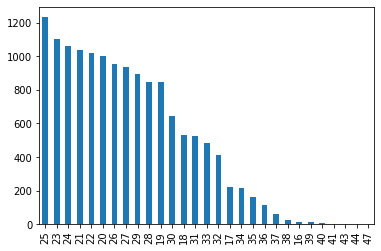

In [4]:
# Code Starts here
# Age counts
train_data.Age.value_counts().plot(kind='bar')

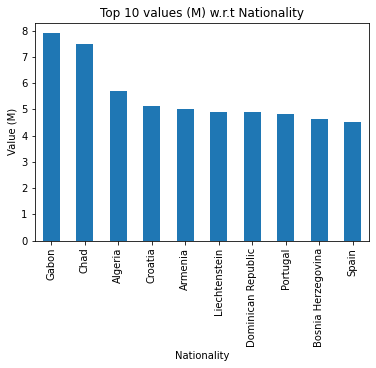

In [5]:
# Top 10 values w.r.t Nationality
g_age=train_data.groupby(['Nationality'])['Value (M)'].mean().sort_values(ascending=False).head(10)
g_age.plot(kind='bar')
plt.ylabel('Value (M)')
plt.title('Top 10 values (M) w.r.t Nationality')
plt.show()

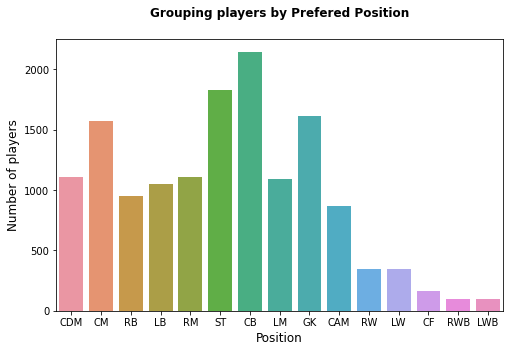

In [6]:
# Count of players by there position

plt.figure(figsize=(8,5))
plt.title('Grouping players by Prefered Position', fontsize=12, fontweight='bold',y=1.06)

sns.countplot(x="Position", data= train_data)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of players', fontsize=12)
plt.show()

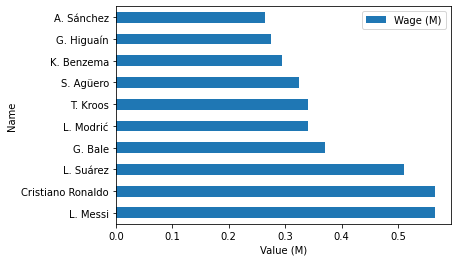

In [7]:
# Wage distribution of top 100 players
distribution_values = train_data.sort_values("Wage (M)",ascending=False).reset_index().head(10)[["Name", "Wage (M)"]]
distribution_values.plot.barh(x='Name', y='Wage (M)')
plt.xlabel('Value (M)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

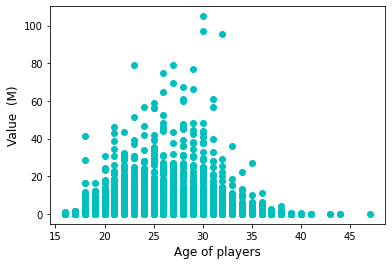

In [8]:
plt.scatter(x=train_data['Age'], y=train_data['Value (M)'], c='c')
plt.xlabel('Age of players', fontsize=12)
plt.ylabel('Value  (M)', fontsize=12)
plt.show
#sns.scatterplot(x=train_data['Age'], y=train_data['Value (M)'])

<AxesSubplot:>

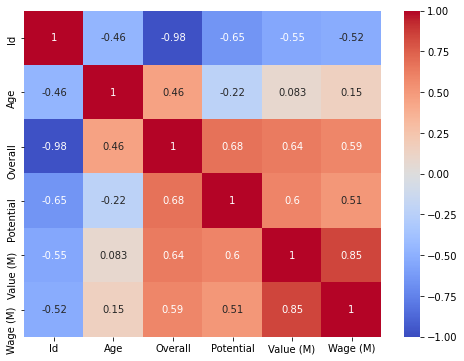

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [10]:
# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [13]:
# Code Starts here
x=train_data.drop(['Value (M)', 'Id'], axis=1)
y=train_data['Value (M)']


In [15]:
# independent variables
X = x[['Overall','Potential','Wage (M)']]

# Separate into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print(X_train.head(10))
print("-------------------------------------")
print(y_train.head(5))

       Overall  Potential  Wage (M)
2980        62         68     0.001
6908        67         67     0.006
13612       65         65     0.005
8104        76         79     0.026
12566       57         72     0.001
6177        62         62     0.001
5826        65         66     0.004
6698        69         69     0.004
6000        69         72     0.004
1084        86         86     0.135
-------------------------------------
2980      0.425
6908      0.180
13612     0.550
8104     10.000
12566     0.210
Name: Value (M), dtype: float64


In [16]:
# Linear regression
model = LinearRegression()

# fit the model on training data
model.fit(X_train,y_train)

# make prediction
y_pred = model.predict(X_test)
y_pred

array([-0.45921139,  5.83591782,  5.44771333, ...,  2.56732764,
        8.51045379, 10.6209457 ])

ValueError: x and y must be the same size

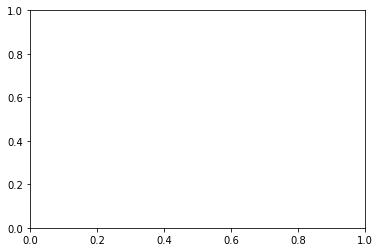

In [25]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
# Mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

1.3431536912551654

In [18]:
# r2 score
r2 = r2_score(y_test,y_pred)
r2

0.7587733808397649

In [ ]:
# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [20]:
# Code Starts here

# Read the test data
test = pd.read_csv('test.csv')
test.head(5)

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [21]:
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test = test[['Overall','Potential','Wage (M)']]

test.head()

,Overall,Potential,Wage (M)
0,82,82,0.046
1,79,85,0.105
2,67,74,0.007
3,65,65,0.002
4,66,67,0.001


In [23]:
# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test


array([10.60460597, 20.02308035,  2.10246886, ...,  1.59249244,
       13.55096875,  6.2474722 ])

In [24]:
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)

In [22]:
# Code ends here